# Artificial Neural Network Fundamentals



- **Artificial Neural Networks (ANNs):** 
  - Supervised learning algorithm inspired by the human brain.
  - Mimics the way neurons are connected and activated, processing inputs to produce outputs.

- **Universal Approximation Theorem:**
  - States that a sufficiently large neural network can approximate any function.
  - With the right architecture and weights, an ANN can predict any output for any given input.
  - Training involves adjusting weights until the network learns to perform a specific task.

- **Image Classification with ANNs:**
  - ImageNet competition demonstrated the effectiveness of ANNs in object classification.
  - Significant reduction in classification error since 2012 when AlexNet, a neural network, won the competition.
  - Deep and complex networks have surpassed human-level performance in image classification and related tasks like object detection and segmentation.



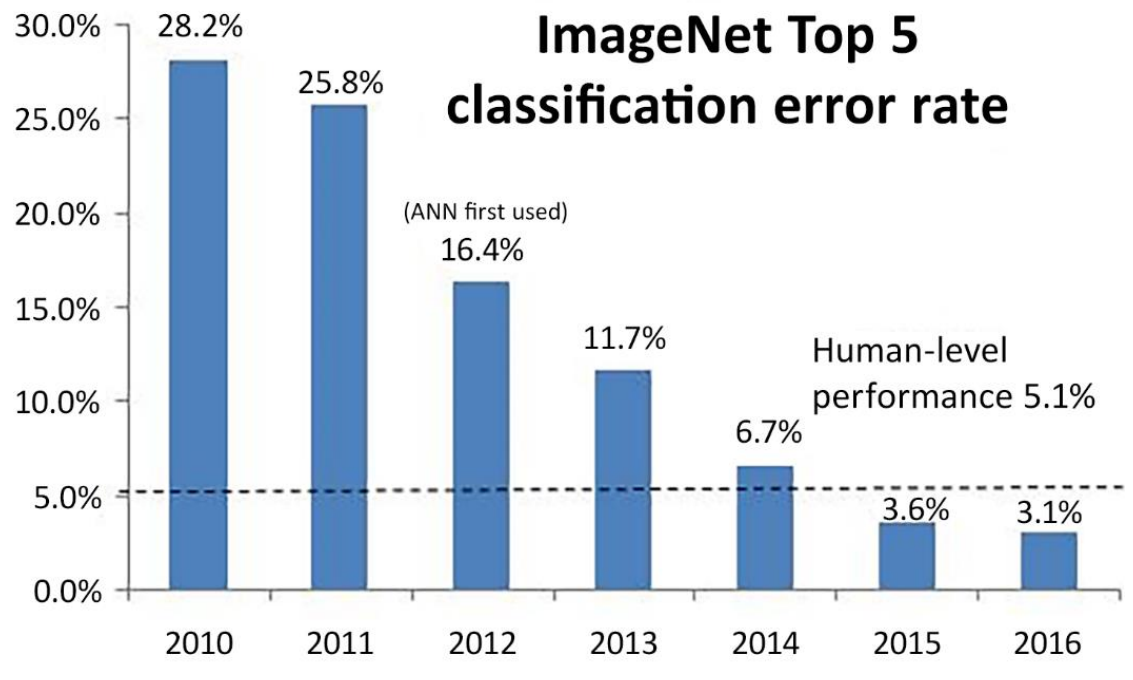

- **Generative AI (GenAI) Applications:**
  - Leveraging ANNs to generate content:
    - Images from text input.
    - Custom images from image and text input.
    - New content from multiple input modalities (image, text, audio).
    - Video generation from text/image input.

- **Motivation for Learning ANNs:**
  - The ability of ANNs to perform complex tasks with high accuracy makes them valuable for custom applications.


# Comparing AI and traditional machine learning

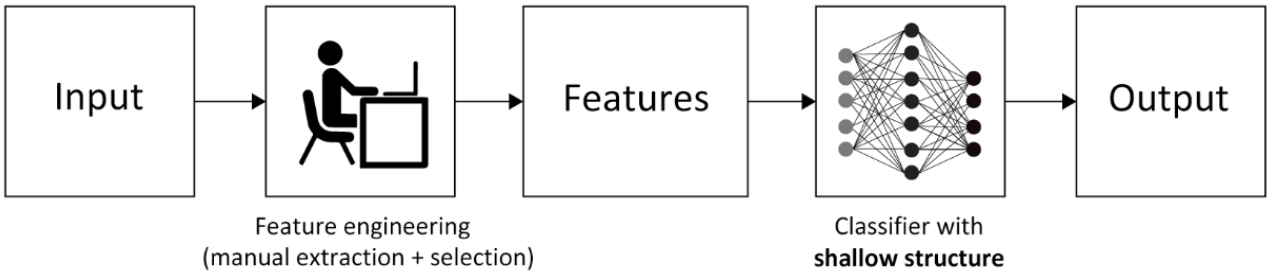

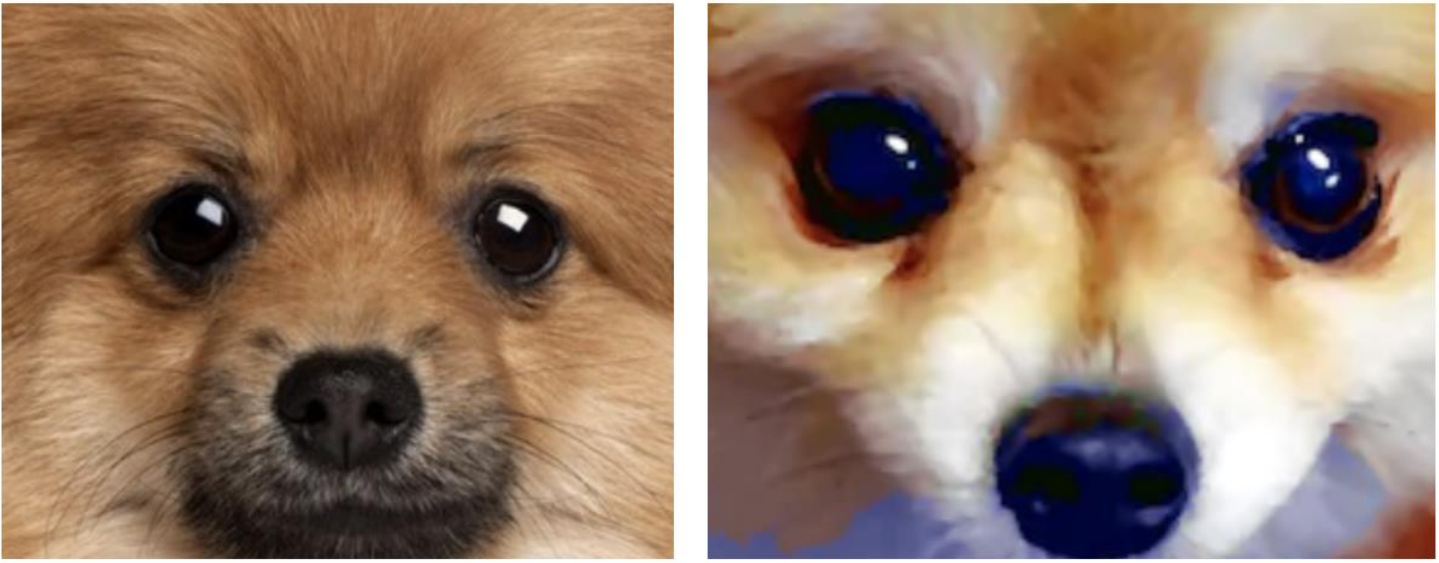

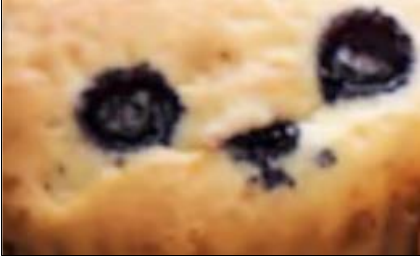

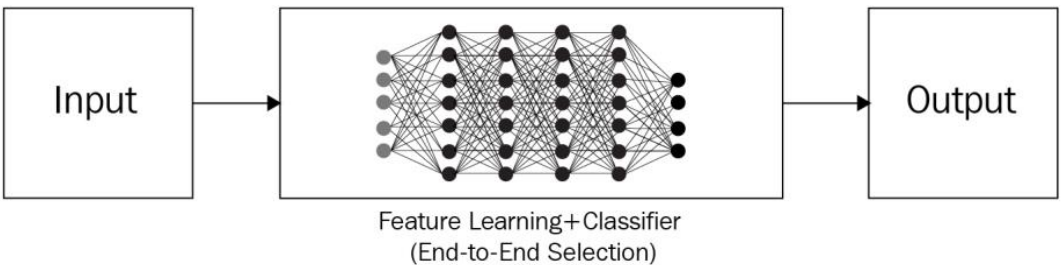

# Learning about the artificial neural network building blocks

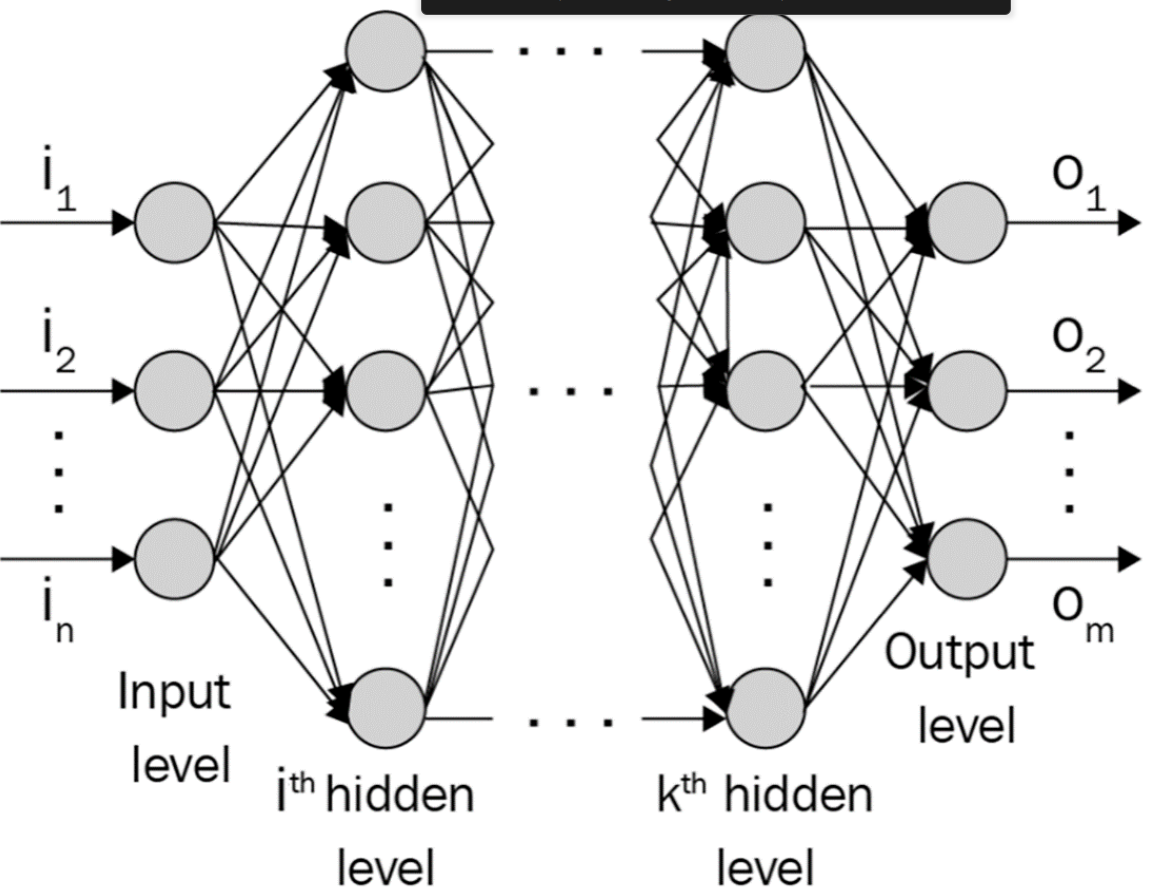

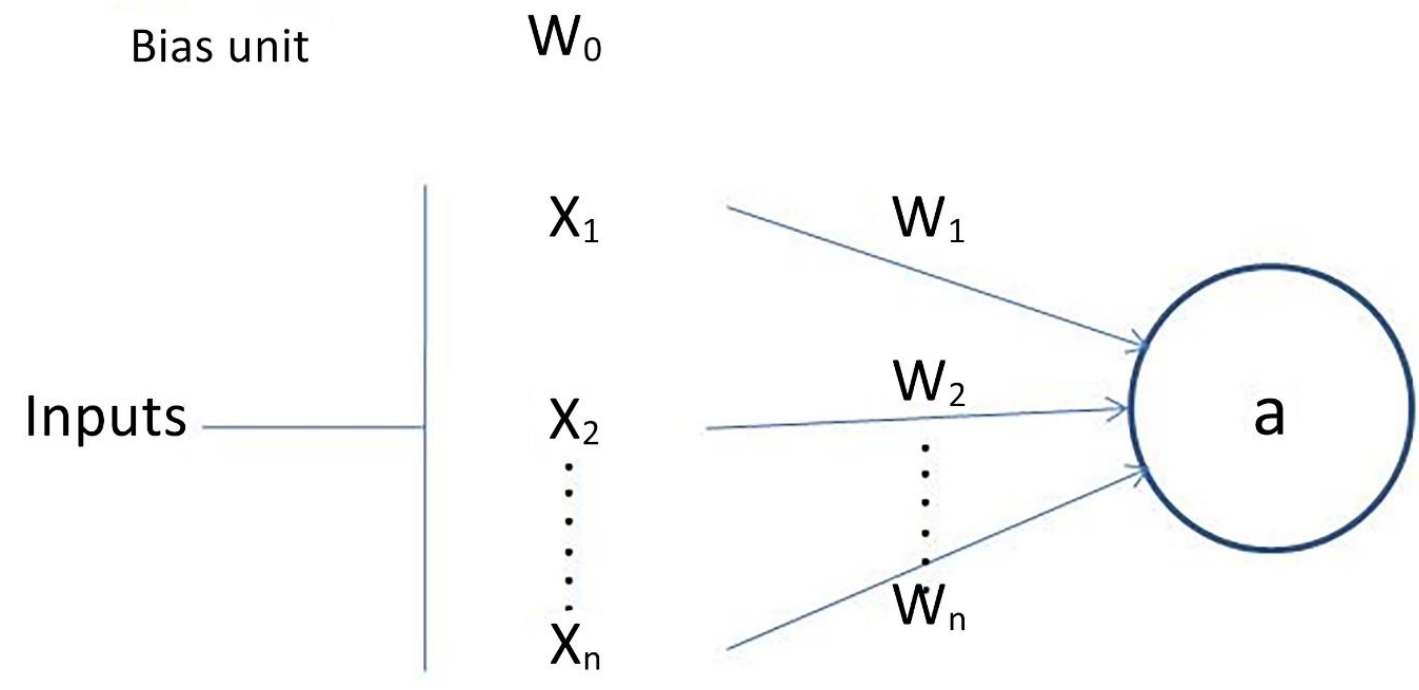

# Implementing feedforward propagation

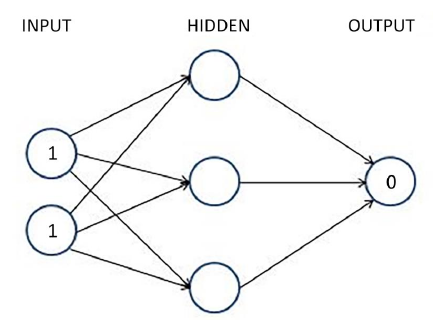

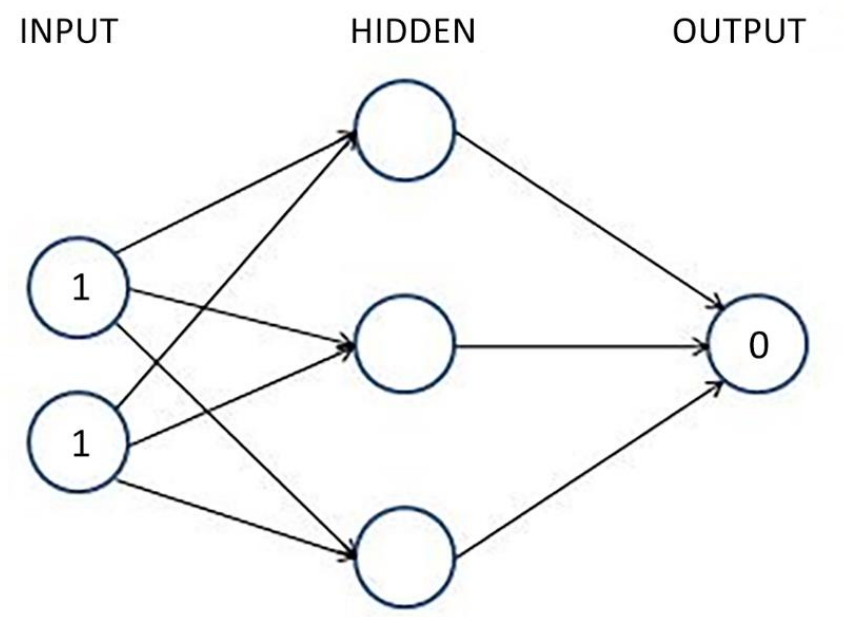

# Calculating the hidden layer unit values

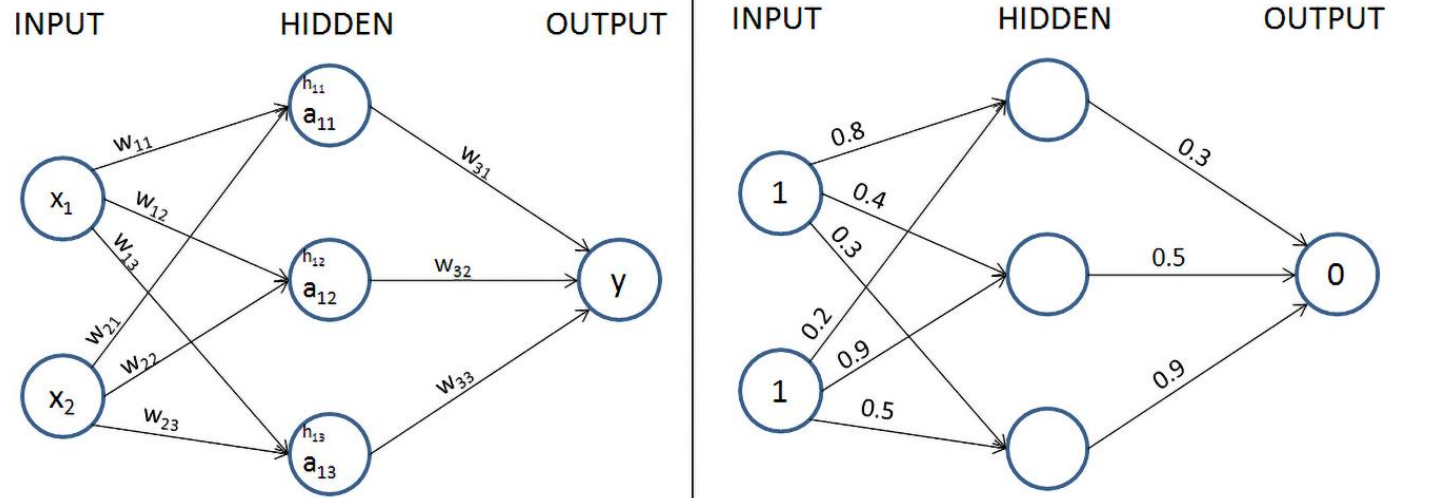

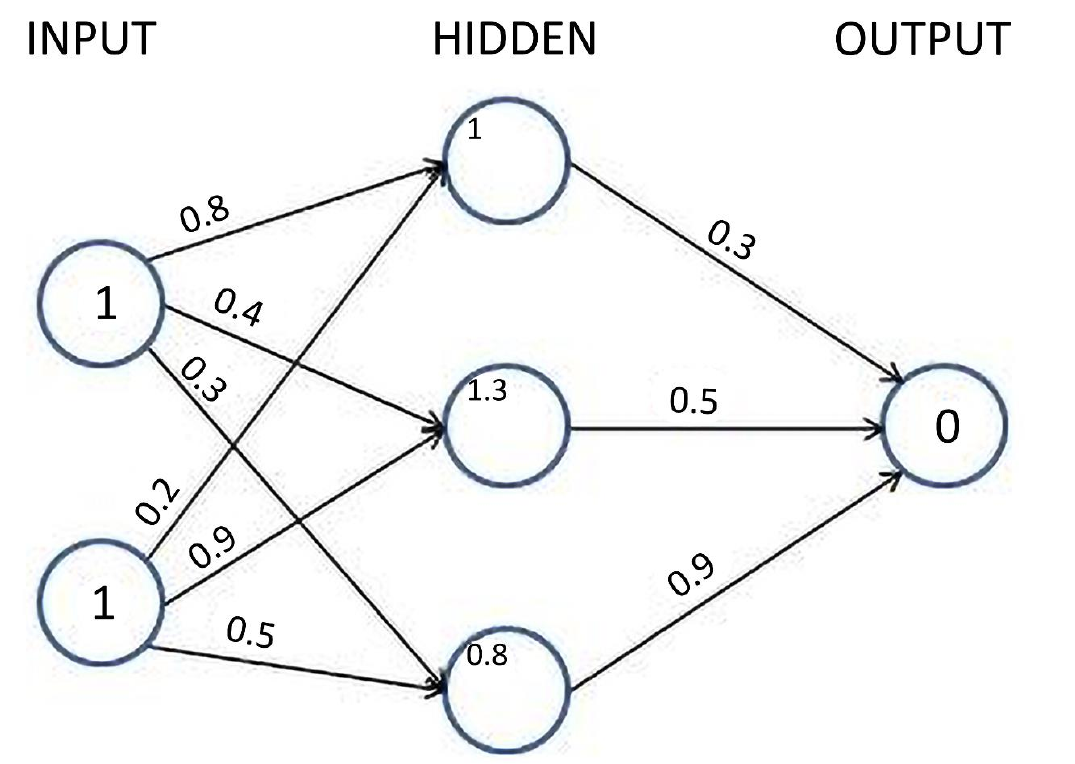

# Applying the activation function

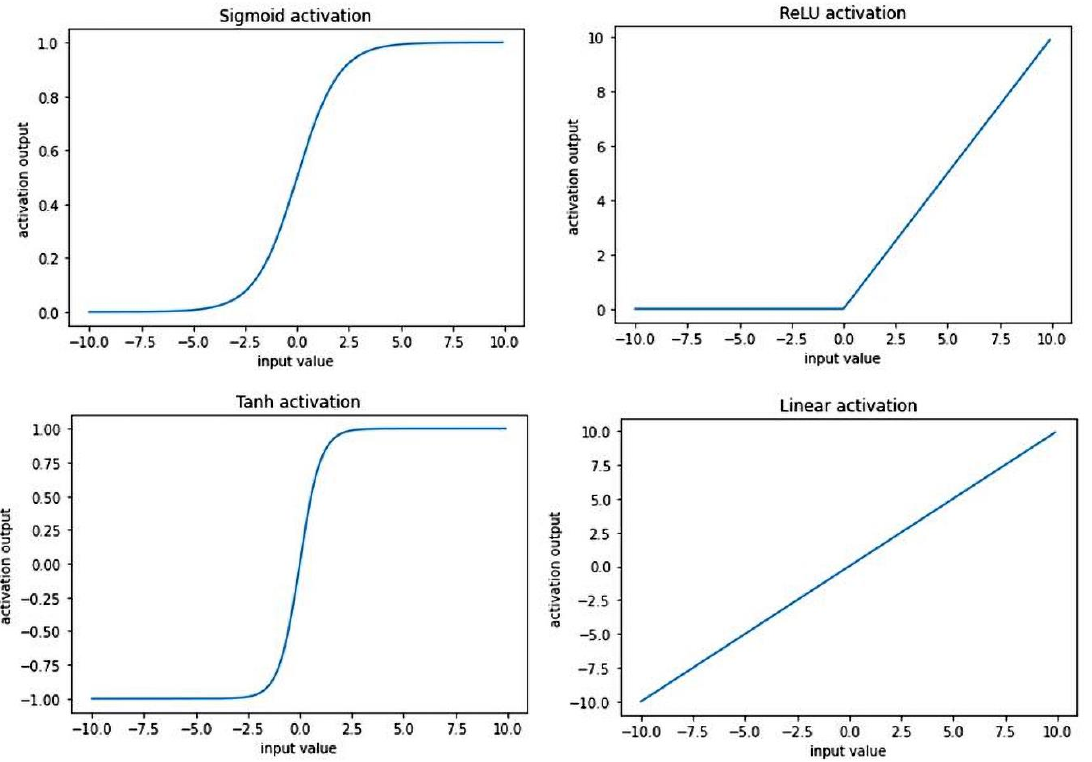

# Calculating the output layer values

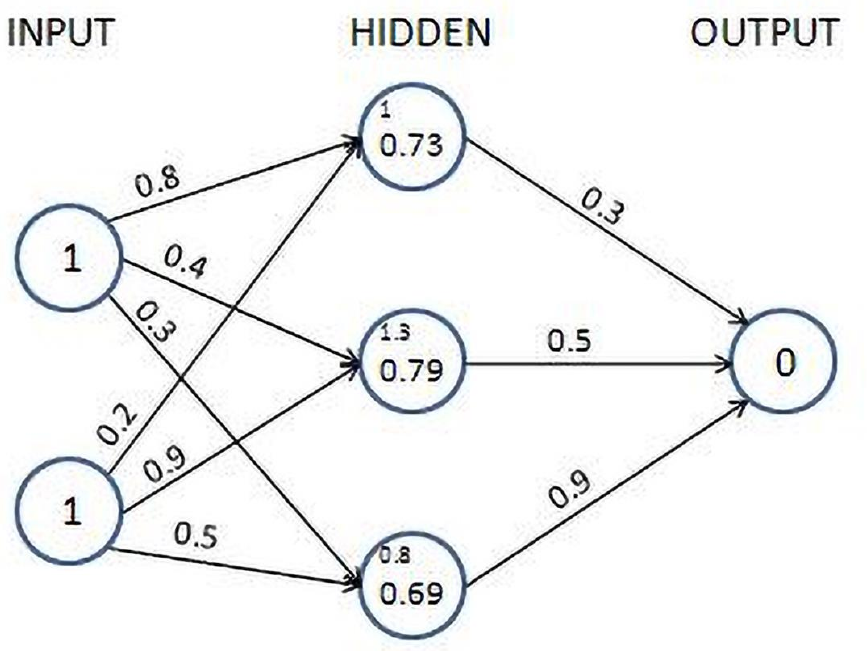

# Calculating loss values
* Categorical variable prediction
* Continuous variable prediction

# Feedforward propagation in code

* A high-level strategy of coding feedforward propagation is:

    1. Perform a sum product at each neuron.
    2. Compute activation.
    3. Repeat the first two steps at each neuron until the output layer.
    4. Compute the loss by comparing the prediction with the actual output.

In [2]:
import numpy as np

def sigmoid(dot_value):
    activate_value = 1 / (1 + np.exp(-dot_value)) 
    return activate_value  

def mean_squared_error(pred_value, true_value):
    mse = np.mean(np.square(pred_value - true_value))
    return mse

def feed_forward(inputs,outputs, weights):
    # First hidden layer
    first_hidden_layer = sigmoid(np.dot(inputs, weights[0]) + weights[1])
    
    # Second hidden layer and output layer
    output_layer = np.dot(first_hidden_layer, weights[2]) + weights[3]

    # Calculate the mean squared error
    mean_squared_error_value = mean_squared_error(output_layer,outputs)
    return mean_squared_error_value

# Activation functions in code

In [3]:
def sigmoid(dot_value):
    activate_value = 1 / (1 + np.exp(-dot_value)) 
    return activate_value

def tanh(dot_value):
    activate_value = (np.exp(dot_value)-np.exp(-dot_value))/(np.exp(dot_value)+np.exp(-dot_value))
    return activate_value

def relu(dot_value):
    activate_value =np.where(dot_value>0,dot_value,0)
    return activate_value

def linear(dot_value):
    return dot_value

def softmax(dot_value):
    activate_value = np.exp(dot_value)/np.sum(np.exp(dot_value))
    return activate_value

# Loss functions in code

In [4]:
def mean_squared_error(pred_value, true_value):
    mse = np.mean(np.square(pred_value - true_value))
    return mse

def mean_absolute_error(pred_value, true_value):
    mae = np.mean(np.abs(pred_value - true_value))
    return mae

def binary_cross_entropy(pred_value, true_value):
    bce = -np.mean(true_value*np.log(pred_value)+ (1-true_value)*np.log(1-pred_value))
    return bce

def categorical_cross_entropy(pred_value, true_value):
    cce = -np.mean(np.log(pred_value[np.arange(len(true_value)),true_value]))

# Gradient descent in code

In [5]:
from copy import deepcopy

def update_weights(inputs, outputs, weights, learning_rate):
    
    # Deep copy of the original weights
    original_weights = deepcopy(weights)

    # Create temporary weights for updates
    temp_weights = deepcopy(weights)

    # Create a copy to store the updated weights
    updated_weights = deepcopy(weights)

    # Calculate the original loss
    original_loss = feed_forward(inputs, outputs, original_weights)

    # Loop through layers and weights
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            
            # Create a deep copy of the weights for this iteration
            temp_weights = deepcopy(weights)
            
            # Add a small perturbation to the weight
            temp_weights[i][index] += 0.0001

            # Calculate the loss with the perturbed weight
            _loss_plus = feed_forward(inputs, outputs, temp_weights)

            # Calculate the gradient
            grad = (_loss_plus - original_loss) / 0.0001

            # Update the weight using gradient descent
            updated_weights[i][index] -= grad * learning_rate

    # Return the updated weights and the original loss
    return updated_weights, original_loss


In [6]:
x = np.array([1, 1])
y = np.array([0])

weights = [
    np.array([[0.8, 0.4, 0.3], [0.2, 0.9, 0.5]]),
    np.array([0.1]),
    np.array([0.3, 0.5, 0.9]),
    np.array([0.3])
]

In [7]:
update_weights(x,y,weights=weights,learning_rate=0.0001)

([array([[0.79998239, 0.39997515, 0.29994207],
         [0.19998239, 0.89997515, 0.49994207]]),
  array([0.09989962]),
  array([0.29976501, 0.49974875, 0.89977732]),
  array([0.29968679])],
 2.4524328233009114)

# Implementing backpropagation using the chain rule

In [7]:
def line():
    print('='*80)

x = np.array([[1,1]]); y = np.array([[0]])  
W = [
    np.array([[-0.0053, 0.3793],
              [-0.5820, -0.5204],
              [-0.2723, 0.1896]], dtype=np.float32).T, 
    np.array([-0.0140, 0.5607, -0.0628], dtype=np.float32), 
    np.array([[ 0.1528, -0.1745, -0.1135]], dtype=np.float32).T, 
    np.array([-0.5516], dtype=np.float32)
]
line()
print('Loss:'.upper())
print(feed_forward(x,y,W))
line()
print('Weights:'.upper())
[print(w) for w in W]
line()
print('Updated Weights:'.upper())
for epx in range(1):
    updated_weights = update_weights(x,y,W,1)
[print(w) for w in updated_weights];

LOSS:
0.33455008989960927
WEIGHTS:
[[-0.0053 -0.582  -0.2723]
 [ 0.3793 -0.5204  0.1896]]
[-0.014   0.5607 -0.0628]
[[ 0.1528]
 [-0.1745]
 [-0.1135]]
[-0.5516]
UPDATED WEIGHTS:
[array([[ 0.03748801, -0.62894595, -0.30494714],
       [ 0.42208242, -0.5673459 ,  0.156948  ]], dtype=float32), array([ 0.02878801,  0.51375407, -0.09545201], dtype=float32), array([[0.8341824 ],
       [0.25095794],
       [0.4228859 ]], dtype=float32), array([0.60529804], dtype=float32)]
0.33455008989960927


### Chain Rule
* Calculate the updated weight value using Chain rule

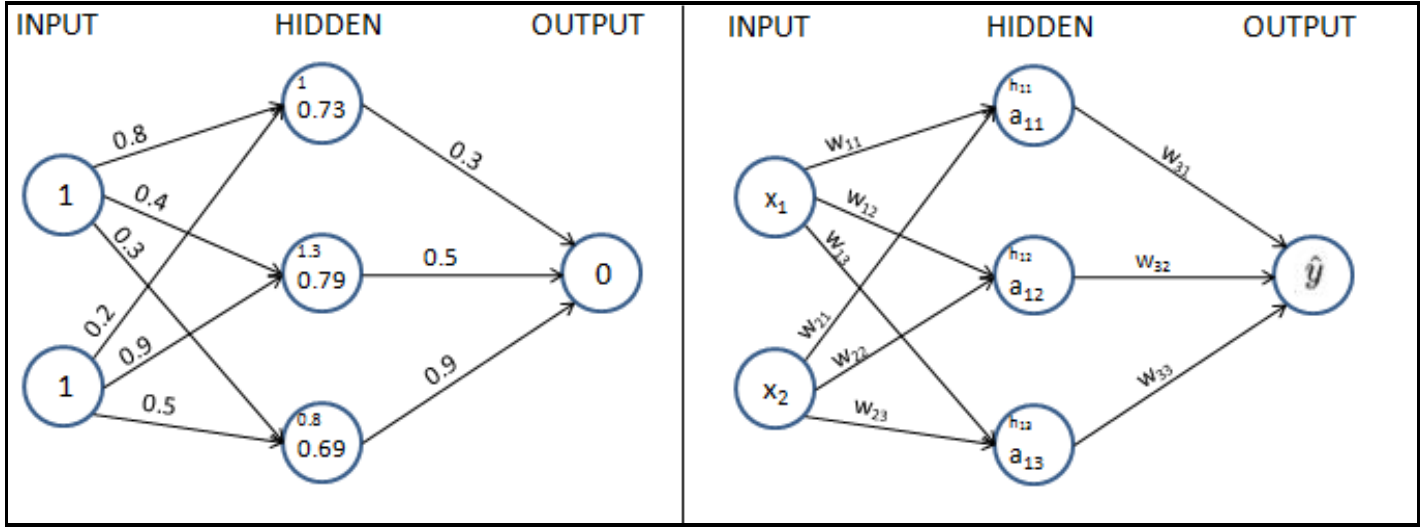

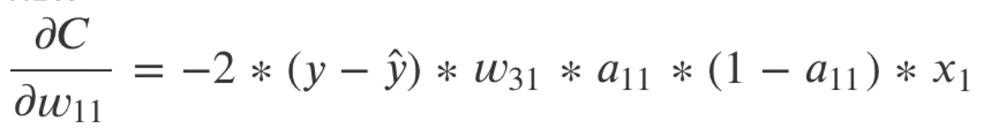

In [8]:
pre_hidden = np.dot(x,W[0])+ W[1]
hidden = sigmoid(pre_hidden)
predicted_value = np.dot(hidden, W[2]) + W[3]

In [9]:
tmp = W[0][0][0] - (-2*(0-(predicted_value[0][0]))*(W[2][0][0])*hidden[0,0]*(1-hidden[0,0])*x[0][0])
print(tmp, updated_weights[0][0][0])

0.03748860333147175 [ 0.03748801 -0.62894595 -0.30494714]


In [10]:
tmp = W[0][0][1] - (-2*(0-(predicted_value[0][0]))*(W[2][1][0])*hidden[0,1]*(1-hidden[0,1])*x[0][0])
print(tmp, updated_weights[0][0][1])

-0.6289373468565382 [ 0.42208242 -0.5673459   0.156948  ]


In [11]:
tmp = W[0][0][2] - (-2*(0-(predicted_value[0][0]))*(W[2][2][0])*hidden[0,2]*(1-hidden[0,2])*x[0][0])
print(tmp, updated_weights[0][0][0])

-0.304951263947996 [ 0.03748801 -0.62894595 -0.30494714]


In [12]:
tmp = W[0][1][0] - (-2*(0-(predicted_value[0][0]))*(W[2][0][0])*hidden[0,0]*(1-hidden[0,0])*x[0][1])
print(tmp, updated_weights[0][1][0])

0.42208860145914084 0.028788012


In [13]:
tmp = W[0][1][1] - (-2*(0-(predicted_value[0][0]))*(W[2][1][0])*hidden[0,1]*(1-hidden[0,1])*x[0][1])
print(tmp, updated_weights[0][1][1])

-0.5673373173880019 0.51375407


In [14]:
tmp = W[0][1][2] - (-2*(0-(predicted_value[0][0]))*(W[2][2][0])*hidden[0,2]*(1-hidden[0,2])*x[0][1])
print(tmp, updated_weights[0][1][2])

0.15694874675699821 -0.09545201


In [15]:
tmp = W[1][0] - (-2*(0-(predicted_value[0][0]))*hidden[0,0]*(1-hidden[0,0])*W[2][0][0])
print(tmp, updated_weights[0][1][0])

0.028788602743620932 0.028788012


In [16]:
tmp = W[1][1] - (-2*(0-(predicted_value[0][0]))*hidden[0,1]*(1-hidden[0,1])*W[2][1][0])
print(tmp, updated_weights[0][1][1])

0.5137626696420274 0.51375407


In [17]:
tmp = W[1][2] - (-2*(0-(predicted_value[0][0]))*hidden[0,2]*(1-hidden[0,2])*W[2][2][0])
print(tmp, updated_weights[0][1][2])

-0.0954512566166247 -0.09545201


In [18]:
tmp = W[2][0][0]-(-2*(0-(predicted_value[0][0]))*hidden[0][0])
print(tmp, updated_weights[0][2][0][0])

0.8342055621416937 0.8341824


In [19]:
tmp = W[2][1][0]-(-2*(0-(predicted_value[0][0]))*hidden[0][1])
print(tmp, updated_weights[0][2][1][0])

0.2509642654210383 0.25095794


In [20]:
tmp = W[2][2][0]-(-2*(0-(predicted_value[0][0]))*hidden[0][2])
print(tmp, updated_weights[0][2][2][0])

0.422898309408289 0.4228859


In [21]:
tmp = W[3][0]-(-2*(0-(predicted_value[0][0])))
print(tmp, updated_weights[0][3][0])

0.6052061234525776 0.60529804


# Putting feedforward propagation and backpropagation together

Text(0.5, 1.0, 'Loss over increasing number of epochs')

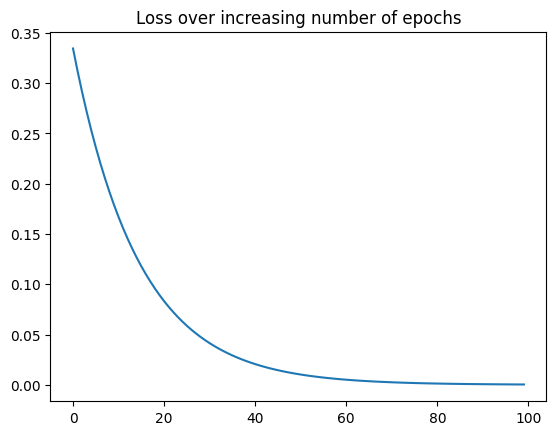

In [22]:
import matplotlib.pyplot as plt
losses = []
for epoch in range(100):
    W, loss = update_weights(x,y,W,0.01)
    losses.append(loss)
plt.plot(losses)
plt.title('Loss over increasing number of epochs')

In [23]:
W

[array([[ 0.01424004, -0.5907864 , -0.27549535],
        [ 0.39883757, -0.52918637,  0.18640439]], dtype=float32),
 array([ 0.00554004,  0.5519136 , -0.06599568], dtype=float32),
 array([[ 0.3475135 ],
        [-0.05529078],
        [ 0.03760847]], dtype=float32),
 array([-0.22443289], dtype=float32)]

In [24]:
pre_hidden = np.dot(x,W[0]) + W[1]
hidden = 1/(1+np.exp(-pre_hidden))
out = np.dot(hidden, W[2]) + W[3]
out

array([[-0.0174781]])

# Understanding the impact of the learning rate

In [25]:
x = [[1],[2],[3],[4]]
y = [[3],[6],[9],[12]]

In [26]:
from copy import deepcopy
import numpy as np
def feed_forward(inputs, outputs, weights):
    out = np.dot(inputs,weights[0])+ weights[1]
    mean_squared_error = np.mean(np.square(out - outputs))
    return mean_squared_error

In [27]:
def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    org_loss = feed_forward(inputs, outputs, original_weights)
    updated_weights = deepcopy(weights)
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - org_loss)/(0.0001)
            updated_weights[i][index] -= grad*lr
    return updated_weights

In [29]:
W = [np.array([[0]], dtype=np.float32), np.array([[0]], dtype=np.float32)]

In [30]:
weight_value = []
for epx in range(1000):
    W = update_weights(x,y,W,0.01)
    weight_value.append(W[0][0][0])


Text(0, 0.5, 'Weight value')

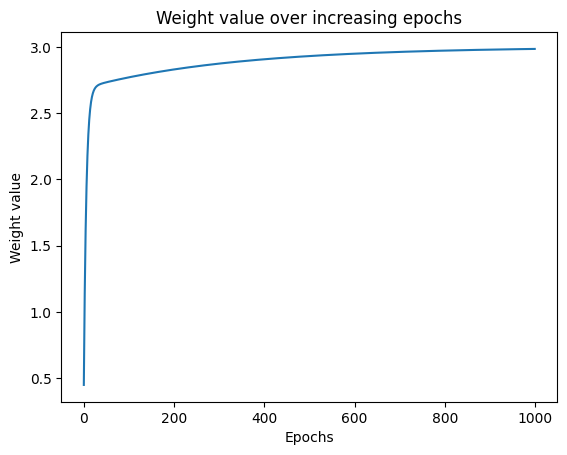

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(weight_value)
plt.title('Weight value over increasing epochs')
plt.xlabel('Epochs')
plt.ylabel('Weight value')

Text(0, 0.5, 'Weight value')

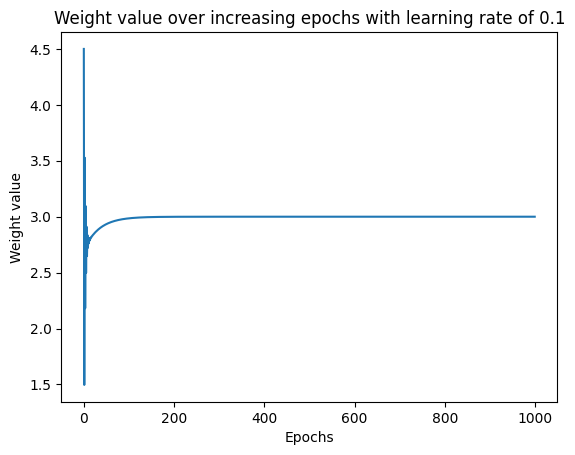

In [32]:
W = [np.array([[0]], dtype=np.float32), np.array([[0]], dtype=np.float32)]
weight_value = []
for epx in range(1000):
    W = update_weights(x,y,W,0.1)
    weight_value.append(W[0][0][0])
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(weight_value)
plt.title('Weight value over increasing epochs with learning rate of 0.1')
plt.xlabel('Epochs')
plt.ylabel('Weight value')

Text(0, 0.5, 'Weight value')

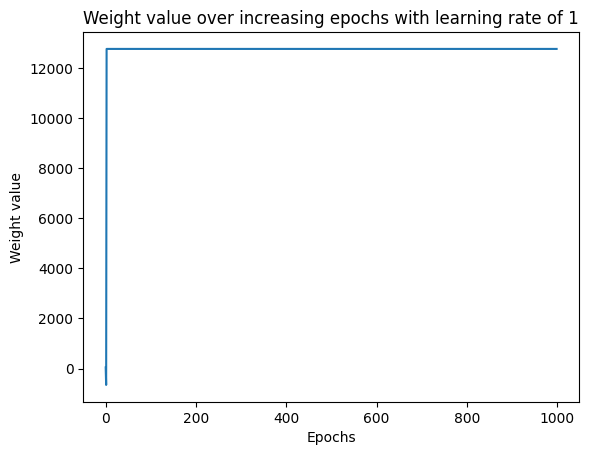

In [33]:
W = [np.array([[0]], dtype=np.float32), np.array([[0]], dtype=np.float32)]
weight_value = []
for epx in range(1000):
    W = update_weights(x,y,W,1)
    weight_value.append(W[0][0][0])
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(weight_value)
plt.title('Weight value over increasing epochs with learning rate of 1')
plt.xlabel('Epochs')
plt.ylabel('Weight value')

In [34]:
def update_weights(inputs, outputs, weights, lr):
    original_weights = deepcopy(weights)
    org_loss = feed_forward(inputs, outputs, original_weights)
    updated_weights = deepcopy(weights)
    for i, layer in enumerate(original_weights):
        for index, weight in np.ndenumerate(layer):
            temp_weights = deepcopy(weights)
            temp_weights[i][index] += 0.0001
            _loss_plus = feed_forward(inputs, outputs, temp_weights)
            grad = (_loss_plus - org_loss)/(0.0001)
            updated_weights[i][index] -= grad*lr
            if(i % 2 == 0):
                print('weight value:', np.round(original_weights[i][index],2), 
                      'original loss:', np.round(org_loss,2), 
                      'loss_plus:', np.round(_loss_plus,2), 
                      'gradient:', np.round(grad,2), 
                      'updated_weights:', np.round(updated_weights[i][index],2))
    return updated_weights

weight value: 0.0 original loss: 67.5 loss_plus: 67.5 gradient: -45.0 updated_weights: 0.45
weight value: 0.45 original loss: 46.88 loss_plus: 46.88 gradient: -37.49 updated_weights: 0.82
weight value: 0.82 original loss: 32.57 loss_plus: 32.57 gradient: -31.26 updated_weights: 1.14
weight value: 1.14 original loss: 22.64 loss_plus: 22.64 gradient: -26.05 updated_weights: 1.4
weight value: 1.4 original loss: 15.75 loss_plus: 15.75 gradient: -21.72 updated_weights: 1.62
weight value: 1.62 original loss: 10.97 loss_plus: 10.97 gradient: -18.1 updated_weights: 1.8
weight value: 1.8 original loss: 7.65 loss_plus: 7.65 gradient: -15.09 updated_weights: 1.95
weight value: 1.95 original loss: 5.35 loss_plus: 5.35 gradient: -12.59 updated_weights: 2.07
weight value: 2.07 original loss: 3.75 loss_plus: 3.75 gradient: -10.49 updated_weights: 2.18
weight value: 2.18 original loss: 2.64 loss_plus: 2.64 gradient: -8.75 updated_weights: 2.27
[array([[2.265477]], dtype=float32), array([[0.7404298]], 

Text(0, 0.5, 'Weight value')

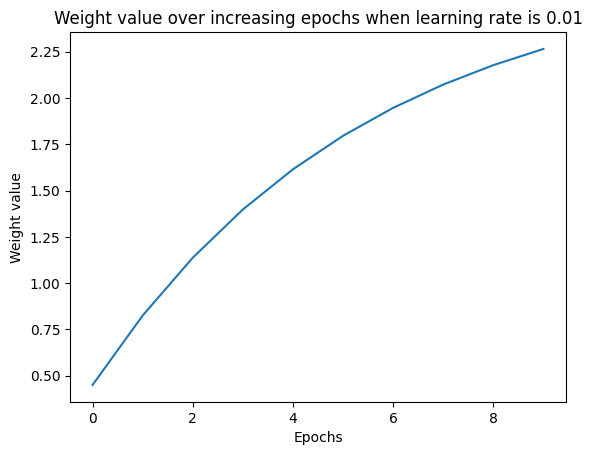

In [35]:
W = [np.array([[0]], dtype=np.float32), np.array([[0]], dtype=np.float32)]
weight_value = []
for epx in range(10):
    W = update_weights(x,y,W,0.01)
    weight_value.append(W[0][0][0])
print(W)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(weight_value[:100])
plt.title('Weight value over increasing epochs when learning rate is 0.01')
plt.xlabel('Epochs')
plt.ylabel('Weight value')

weight value: 0.0 original loss: 67.5 loss_plus: 67.5 gradient: -45.0 updated_weights: 4.5
weight value: 4.5 original loss: 30.37 loss_plus: 30.38 gradient: 30.04 updated_weights: 1.5
weight value: 1.5 original loss: 13.79 loss_plus: 13.78 gradient: -20.31 updated_weights: 3.53
weight value: 3.53 original loss: 6.25 loss_plus: 6.26 gradient: 13.46 updated_weights: 2.18
weight value: 2.18 original loss: 2.85 loss_plus: 2.85 gradient: -9.14 updated_weights: 3.1
weight value: 3.1 original loss: 1.33 loss_plus: 1.33 gradient: 5.97 updated_weights: 2.5
weight value: 2.5 original loss: 0.65 loss_plus: 0.65 gradient: -4.12 updated_weights: 2.91
weight value: 2.91 original loss: 0.34 loss_plus: 0.34 gradient: 2.63 updated_weights: 2.65
weight value: 2.65 original loss: 0.2 loss_plus: 0.2 gradient: -1.88 updated_weights: 2.84
weight value: 2.84 original loss: 0.13 loss_plus: 0.13 gradient: 1.14 updated_weights: 2.72
[array([[2.7217765]], dtype=float32), array([[0.6589097]], dtype=float32)]


Text(0, 0.5, 'Weight value')

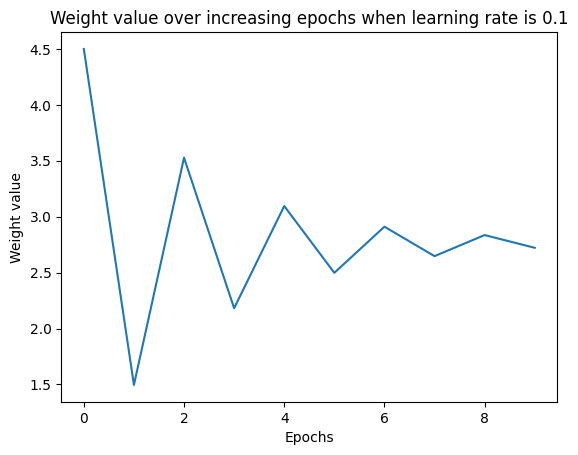

In [36]:
W = [np.array([[0]], dtype=np.float32), np.array([[0]], dtype=np.float32)]
weight_value = []
for epx in range(10):
    W = update_weights(x,y,W,0.1)
    weight_value.append(W[0][0][0])
print(W)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(weight_value[:100])
plt.title('Weight value over increasing epochs when learning rate is 0.1')
plt.xlabel('Epochs')
plt.ylabel('Weight value')

weight value: 0.0 original loss: 67.5 loss_plus: 67.5 gradient: -45.0 updated_weights: 45.0
weight value: 45.0 original loss: 16604.45 loss_plus: 16604.52 gradient: 699.22 updated_weights: -654.22
weight value: -654.22 original loss: 4030779.1 loss_plus: 4030777.76 gradient: -13409.38 updated_weights: 12755.16
weight value: 12755.16 original loss: 1473935827.59 loss_plus: 1473935827.59 gradient: 0.0 updated_weights: 12755.16
weight value: 12755.16 original loss: 1473935827.59 loss_plus: 1473935827.59 gradient: 0.0 updated_weights: 12755.16
weight value: 12755.16 original loss: 1473935827.59 loss_plus: 1473935827.59 gradient: 0.0 updated_weights: 12755.16
weight value: 12755.16 original loss: 1473935827.59 loss_plus: 1473935827.59 gradient: 0.0 updated_weights: 12755.16
weight value: 12755.16 original loss: 1473935827.59 loss_plus: 1473935827.59 gradient: 0.0 updated_weights: 12755.16
weight value: 12755.16 original loss: 1473935827.59 loss_plus: 1473935827.59 gradient: 0.0 updated_weig

Text(0, 0.5, 'Weight value')

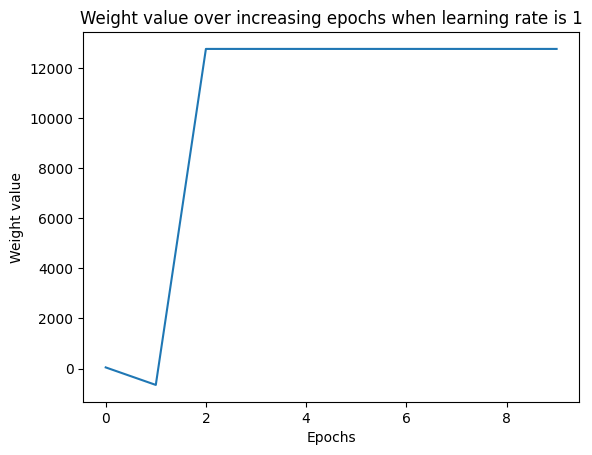

In [37]:
W = [np.array([[0]], dtype=np.float32), np.array([[0]], dtype=np.float32)]
weight_value = []
for epx in range(10):
    W = update_weights(x,y,W,1)
    weight_value.append(W[0][0][0])
print(W)
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(weight_value[:100])
plt.title('Weight value over increasing epochs when learning rate is 1')
plt.xlabel('Epochs')
plt.ylabel('Weight value')